# Finding 'Oscillations' With Filters

In [1]:
import numpy as np
from neurodsp import sim, filt

from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series

from fooof.bands import Bands

In [2]:
# Settings
s_rate = 500
n_seconds = 5
times = create_times(n_seconds, s_rate)

In [3]:
# Define our bands of interest
bands = Bands(
    {'delta' : [1, 4],
     'theta' : [4, 8],
     'alpha' : [8, 13],
     'beta' : [13, 30],
     'gamma' : [30, 50]}
)

### Create a signal

In [4]:
# Create a signal
sig = sim.aperiodic.sim_synaptic_current(n_seconds, s_rate)
#sig = sim.aperiodic.sim_powerlaw(n_seconds, s_rate, exponent=-1)  # Pink Noise
#sig = sim.aperiodic.sim_powerlaw(n_seconds, s_rate, exponent=0)   # White Noise

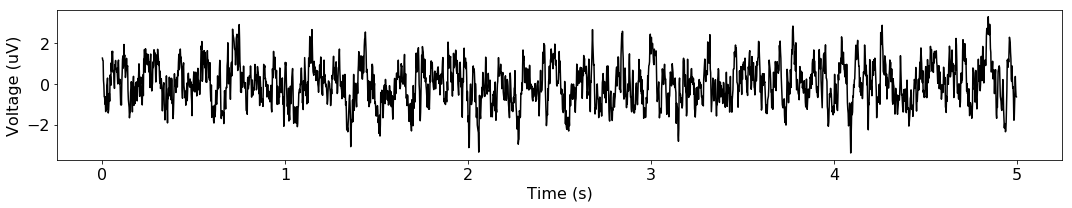

In [5]:
plot_time_series(times, sig)

### Check out Band-by-Band Filtering

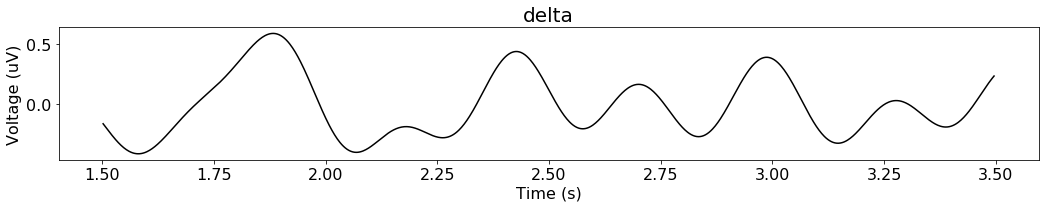

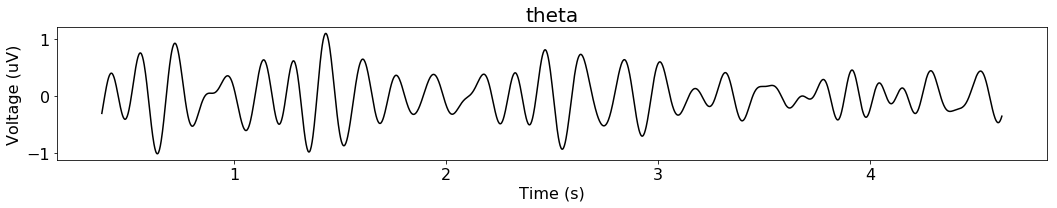

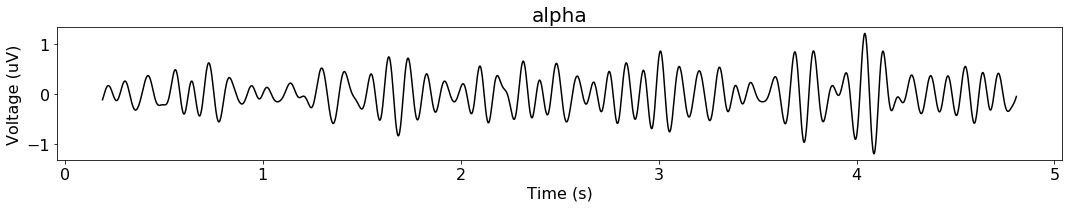

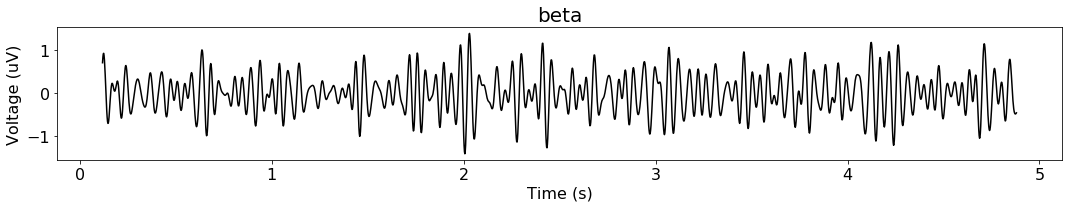

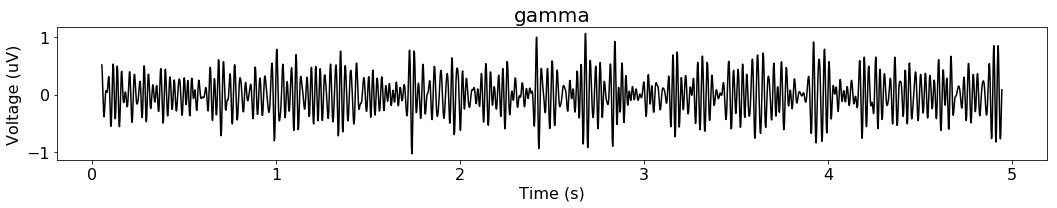

In [6]:
for label, f_range in bands:
    band_sig = filt.filter_signal(sig, s_rate, 'bandpass', f_range)
    plot_time_series(times, band_sig, title=label)

### Conclusions. 

So yeh - throw a filter on there and you'll find some 'oscillations'. 

Editorial Notes:
- lol wow. I hadn't checked this idea quite like this before, and it's looks pretty problematic for easy it seems to be to easily and happily run along computing and interpreting metrics computed on filtered signals, in which no real rhythmicity is likely...
- So, this could be a dumb question, but since this signal has a 1/f power spectrum, shouldn't we expect that the y-axis ranges should scale with the frequency range (like delta should have greate average power than beta, etc.). We... don't see that?
- I sorta want to run simulations on this kind of analysis, and see how easy it is to see significant 'time-related changes', either at totally random time points or at moments in which small 1/f changes happen. It also looks worth exploring how easy it is to see 'significant' frequency band interactions, such as PAC or amplitude correlations, again, also under these static signals, and when there are slope shifts. 